In [20]:
import pandas as pd
import numpy as np
import onchain_data as script
import  onchain_data
import query_data
import requests as re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sea


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Slippage and Volume Analysis 
## 1.2 Arbitrum

In [6]:
# Loading data
network = 'Arbitrum'
objQuery = query_data.Query(script = script.swap_arb)
df_swap = objQuery.query_data(category = 'pool_name', groupby='day',start_date='2022-06-01').data
df_swap



,date,vol,slippage,__row_index
0,2022-12-29T00:00:00.000Z,503.309437,0.002587,0
1,2022-12-30T00:00:00.000Z,8727.450768,-0.012591,1
2,2022-12-31T00:00:00.000Z,13317.219519,-0.014273,2
3,2023-01-01T00:00:00.000Z,61296.278654,-0.010626,3
4,2023-01-02T00:00:00.000Z,50593.359474,-0.001949,4
...,...,...,...,...
168,2023-06-15T00:00:00.000Z,555456.109548,-0.008288,168
169,2023-06-16T00:00:00.000Z,400138.166484,-0.008226,169
170,2023-06-17T00:00:00.000Z,183462.473269,-0.006584,170
171,2023-06-18T00:00:00.000Z,112320.619746,-0.008033,171


In [7]:
# Data Prep

# Getting absolute values of slippage
df_swap.slippage = df_swap.slippage.abs()

# Removing Outliers
df_sorted = df_swap.sort_values('vol', ascending=False)
df_swap_adj= df_sorted.drop(df_sorted.index[:3])
df_swap_adj = df_swap_adj.reset_index(drop=True)

df_swap_adj


,date,vol,slippage,__row_index
0,2023-03-18T00:00:00.000Z,4.471173e+06,0.008958,79
1,2023-02-18T00:00:00.000Z,3.777161e+06,0.008768,51
2,2023-03-20T00:00:00.000Z,3.625858e+06,0.009277,81
3,2023-02-07T00:00:00.000Z,3.512796e+06,0.017652,40
4,2023-03-15T00:00:00.000Z,3.486460e+06,0.010723,76
...,...,...,...,...
165,2023-01-07T00:00:00.000Z,2.284207e+04,0.000104,9
166,2022-12-31T00:00:00.000Z,1.331722e+04,0.014273,2
167,2023-06-19T00:00:00.000Z,9.669091e+03,0.005814,172
168,2022-12-30T00:00:00.000Z,8.727451e+03,0.012591,1


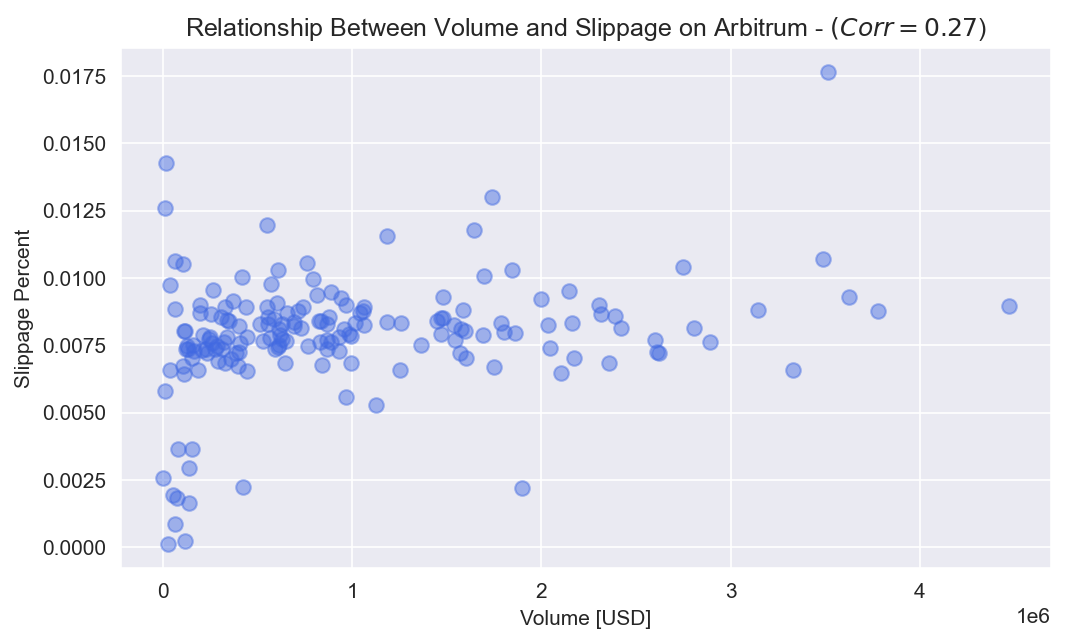

In [8]:
# Correlation Analysis
df_swap = df_swap_adj
plt.figure()
sea.set_style('darkgrid', {'axis.grid': True})

#Data
X = df_swap.vol.to_numpy()
Y = df_swap.slippage.to_numpy()

#Correlation
corr = round(df_swap.vol.corr(df_swap.slippage),2)

#Scatter
plt.plot(X,Y,'o',linewidth = 2.4, markersize = 7, alpha = 0.45, color = 'royalblue' )
    
#Labels
plt.xlabel('Volume [USD]')
plt.ylabel('Slippage Percent')
plt.title(f'Relationship Between Volume and Slippage on {network} - $(Corr = {corr}$)')

#Settings
plt.gcf().set_dpi(150)
plt.gcf().set_size_inches(8,4.5)


## 1.2 Polygon

In [9]:
# Loading data
network = 'Polygon'
objQuery = query_data.Query(script = script.swap_matic)
df_swap = objQuery.query_data(groupby='day',start_date='2022-06-01').data
df_swap

,date,vol,slippage,slippage_overall,vol_cumulative,__row_index
0,2022-06-13T00:00:00.000Z,455755.78,0.000809,-0.003335,2.726861e+06,0
1,2022-06-14T00:00:00.000Z,515689.47,-0.008921,-0.003335,3.242551e+06,1
2,2022-06-15T00:00:00.000Z,637260.69,-0.007250,-0.003335,3.879811e+06,2
3,2022-06-16T00:00:00.000Z,92929.18,-0.007516,-0.003335,3.972740e+06,3
4,2022-06-17T00:00:00.000Z,165227.98,-0.005685,-0.003335,4.137968e+06,4
...,...,...,...,...,...,...
379,2023-06-09T00:00:00.000Z,504984.64,-0.002141,-0.003335,4.324506e+08,379
380,2023-06-10T00:00:00.000Z,1344935.37,-0.002518,-0.003335,4.337955e+08,380
381,2023-06-11T00:00:00.000Z,335055.45,0.000030,-0.003335,4.341306e+08,381
382,2023-06-12T00:00:00.000Z,222667.65,-0.001031,-0.003335,4.343533e+08,382


In [10]:
# Data Prep

# Getting absolute values of slippage
df_swap.slippage = df_swap.slippage.abs()

# Removing Outliers
df_sorted = df_swap.sort_values('vol', ascending=False)
df_swap_adj= df_sorted.drop(df_sorted.index[:3])
df_swap_adj = df_swap_adj.reset_index(drop=True)

df_swap_adj


,date,vol,slippage,slippage_overall,vol_cumulative,__row_index
0,2022-10-25T00:00:00.000Z,6229890.10,0.006260,-0.003335,1.209132e+08,356
1,2022-11-10T00:00:00.000Z,4820842.88,0.002089,-0.003335,1.684162e+08,78
2,2022-09-21T00:00:00.000Z,4766257.41,0.002602,-0.003335,8.560036e+07,160
3,2022-11-13T00:00:00.000Z,4548018.87,0.004015,-0.003335,1.774968e+08,81
4,2023-02-18T00:00:00.000Z,4394477.92,0.001201,-0.003335,3.300532e+08,322
...,...,...,...,...,...,...
376,2022-07-12T00:00:00.000Z,73176.63,0.008694,-0.003335,1.165003e+07,245
377,2023-01-07T00:00:00.000Z,68527.60,0.000867,-0.003335,2.380162e+08,316
378,2023-06-04T00:00:00.000Z,61916.97,0.001807,-0.003335,4.300354e+08,236
379,2022-06-05T00:00:00.000Z,22261.44,0.002435,-0.003335,9.002475e+05,292


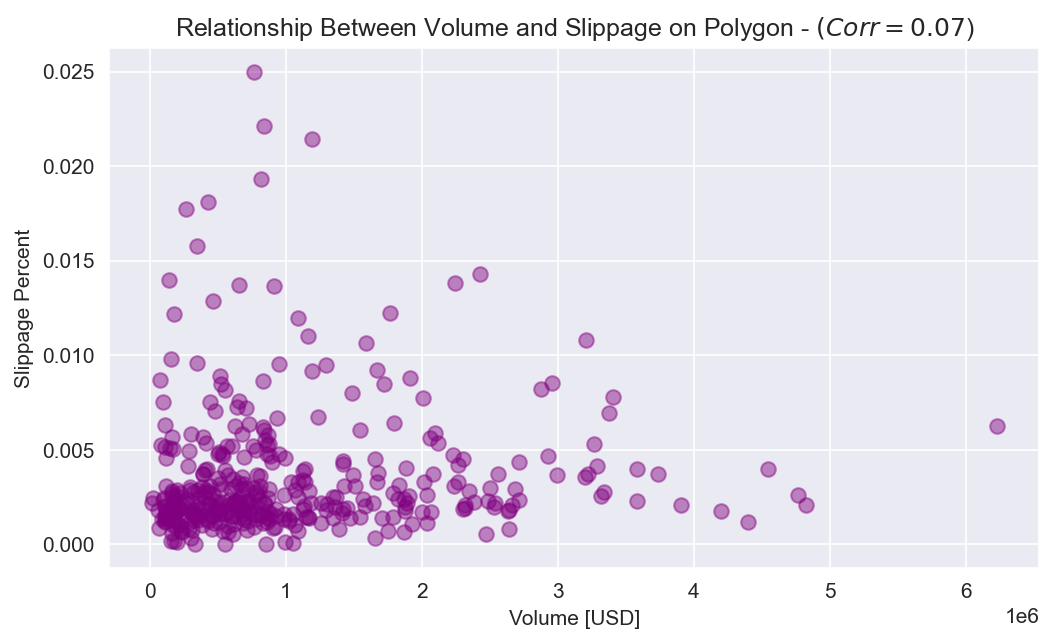

In [11]:
# Correlation Analysis
df_swap = df_swap_adj
plt.figure()
sea.set_style('darkgrid', {'axis.grid': True})

#Data
X = df_swap.vol.to_numpy()
Y = df_swap.slippage.to_numpy()

#Correlation
corr = round(df_swap.vol.corr(df_swap.slippage),2)

#Scatter
plt.plot(X,Y,'o',linewidth = 2.4, markersize = 7, alpha = 0.45, color = 'purple' )
    
#Labels
plt.xlabel('Volume [USD]')
plt.ylabel('Slippage Percent')
plt.title(f'Relationship Between Volume and Slippage on {network} - $(Corr = {corr}$)')

#Settings
plt.gcf().set_dpi(150)
plt.gcf().set_size_inches(8,4.5)


# 2. Slippage Simulation
## 2.1 Simpler Example (USDC-DAI case)

In [102]:
dai_price = 1  #Dai price in USDC
dai =4000 ; usdc = 4000 #supply in USDC and DAI
k = dai * usdc # the invariante  product (total liquidity)
deposit_limit = 4  #Deposit in Dai to exchange for USDC

def AMM_contract(A_amount, A_price, B_amount, deposit_limit):
    k = A_amount * B_amount
    B_price = A_price**-1
    matrix = [[A_amount,B_amount, k, B_price, A_price]]
    A_amount_new = 0
    B_amount_new = 0
    deposit = 1
    while True:
        if deposit < deposit_limit + 1: 
            A_amount_new = A_amount + deposit
            B_amount_new = round(k/ A_amount_new,2)
            delta_B = B_amount - round(k/ A_amount_new,2)  # (X + )
            B_price = round( deposit/delta_B,2)
            A_price_new = round(delta_B/deposit,2)
            matrix.append([A_amount_new,B_amount_new, k,  B_price, A_price_new])
            deposit+=1
        else:
            break
    df_amm = pd.DataFrame(matrix, columns = ['DAI', 'USDC', 'K', 'Price of USDC in DAI', 'Price of DAI in USDC'])
    df_amm['slippage_percent'] = round(df_amm['Price of DAI in USDC'].apply(lambda x: (x - A_price) * 100/x),2)
    return df_amm.reset_index().rename(columns = {'index':'deposit_number'})

df = AMM_contract(A_amount = dai,A_price =  dai_price, B_amount = usdc,deposit_limit= deposit_limit)
df

,deposit_number,DAI,USDC,K,Price of USDC in DAI,Price of DAI in USDC,slippage_percent
0,0,4000,4000.0,16000000,1.0,1.0,0.0
1,1,4001,3999.0,16000000,1.0,1.0,0.0
2,2,4002,3998.0,16000000,1.0,1.0,0.0
3,3,4003,3997.0,16000000,1.0,1.0,0.0
4,4,4004,3996.0,16000000,1.0,1.0,0.0


In [229]:
df.to_excel('slippage-simullation.xlsx',index= False)

## Draft

### Liquidity Simulator

In [2]:
token_prices

{'DAI': 0.999312,
 'WETH': 1717.03,
 'GNS': 3.92,
 'MATIC': 0.592593,
 'USDC': 0.999184}

In [85]:
token_prices = onchain_data.get_token_prices()
token_prices

{'DAI': 1.0, 'WETH': 1781.87, 'GNS': 4.12, 'MATIC': 0.628345, 'USDC': 0.999453}

In [99]:
def AMM_contract(in_amount, in_price_usd, out_amount, out_price_usd, deposit_limit, token_from, step = 20):
    k = in_amount * out_amount
    out_price = out_price_usd/in_price_usd # Price of Token IN in Token Out
    in_price= out_price**-1 # Price of Token OUT in Token IN
    in_amount_new = 0
    out_amount_new = 0
    matrix = [[0,in_amount,out_amount, k, out_price, in_price]]
    deposit =deposit_limit/step
   
    while True:
        if deposit < deposit_limit + deposit_limit/step:
            in_amount_new = in_amount + deposit
            out_amount_new = k/ in_amount_new
            delta_out = out_amount - k/ in_amount_new  
            out_price_new = (deposit/delta_out)
            matrix.append([deposit,in_amount_new,out_amount_new, k,  out_price_new,out_price_new**-1])
            deposit+= deposit_limit/step
        else:
            break
    df_amm = pd.DataFrame(matrix, columns = ['token_deposit',token_from, 'GNS', 'K', f'Price of GNS in {token_from}',f'Price of {token_from} in GNS' ])
    df_amm['Price of GNS in USD'] = df_amm[f'Price of GNS in {token_from}'] * in_price_usd
    first_price = df_amm[f'Price of GNS in {token_from}'].iloc[0]
    df_amm['GNS Slippage percent'] = (df_amm[f'Price of GNS in {token_from}'] - first_price) / first_price * 100
    df_amm['Amount_IN_USD'] = df_amm.token_deposit * in_price_usd
    df_amm = df_amm.assign(Amount_OUT_USD = lambda x: (out_amount - x['GNS']) * out_price_usd)
    df_amm['Slippage_USD'] = df_amm.Amount_IN_USD	- df_amm.Amount_OUT_USD
    return df_amm

# Input
token0 = 'GNS' #fixed
token1 = 'USDC' #var
amount0 = 1000000 #Amount of token0
amount1 = 4000000 # amount of token1
deposit_token1= 1

# Transformations
df = query_data.AMM_contract(in_amount = amount1,
                  in_price_usd = token_prices[token1],
                  out_amount = amount0 ,
                  out_price_usd = token_prices[token0],
                  deposit_limit= deposit_token1,
                  token_from =token1
                  )
df

,token_deposit,WETH,GNS,K,Price of GNS in WETH,Price of WETH in GNSD,Price of GNS in USD,GNS Slippage percent,Amount_IN_USD,Amount_OUT_USD,Slippage_USD
0,0.00,72.00,1.800000e+06,129600000,0.002312,432.492718,4.120000,0.000000,0.0000,0.000000,0.000000
1,0.05,72.05,1.798751e+06,129600000,0.000040,24982.650937,0.071324,-98.268828,89.0935,5146.426093,-5057.332593
2,0.10,72.10,1.797503e+06,129600000,0.000040,24965.325936,0.071374,-98.267626,178.1870,10285.714286,-10107.527286
3,0.15,72.15,1.796258e+06,129600000,0.000040,24948.024948,0.071423,-98.266425,267.2805,15417.879418,-15150.598918
4,0.20,72.20,1.795014e+06,129600000,0.000040,24930.747922,0.071473,-98.265224,356.3740,20542.936288,-20186.562288
5,0.25,72.25,1.793772e+06,129600000,0.000040,24913.494810,0.071522,-98.264022,445.4675,25660.899654,-25215.432154
6,0.30,72.30,1.792531e+06,129600000,0.000040,24896.265560,0.071572,-98.262821,534.5610,30771.784232,-30237.223232
7,0.35,72.35,1.791292e+06,129600000,0.000040,24879.060124,0.071621,-98.261620,623.6545,35875.604699,-35251.950199
8,0.40,72.40,1.790055e+06,129600000,0.000040,24861.878453,0.071671,-98.260418,712.7480,40972.375691,-40259.627691
9,0.45,72.45,1.788820e+06,129600000,0.000040,24844.720497,0.071720,-98.259217,801.8415,46062.111801,-45260.270301


In [58]:
df_melt = df.melt(id_vars=["token_deposit"], value_vars=[token1, 'GNS'], 
                      var_name="Token", value_name="Reserve")

fig.update_layout(
    autosize=True,
    margin=dict(l=10, r=10, b=10, t=10, pad=0)
)

fig = px.bar(df_melt, x="Token", y="Reserve", color="Token",
                animation_frame="token_deposit", range_y=[0, df[[token1, 'GNS']].max().max() + 5],
                height=600)  # Set the height of the chart explicitly

fig.show()

In [59]:
df_melt = df.melt(id_vars=["token_deposit"], value_vars=["Amount_IN_USD", "Amount_OUT_USD"], 
                      var_name="Token Flow", value_name="Amount in USD")

fig = px.bar(df_melt, x="Token Flow", y="Amount in USD", color="Token Flow",
                animation_frame="token_deposit", range_y=[0, df[["Amount_IN_USD", "Amount_OUT_USD"]].max().max() + 5],
                height=600)  # Set the height of the chart explicitly

fig.update_layout(
    autosize=True,
    margin=dict(l=10, r=10, b=10, t=10, pad=0)
)

fig.show()

In [72]:
token1

'USDC'

In [76]:
df[f'Price of GNS in {token1}']

0     4.073055
1     4.010000
2     4.020000
3     4.030000
4     4.040000
5     4.050000
6     4.060000
7     4.070000
8     4.080000
9     4.090000
10    4.100000
11    4.110000
12    4.120000
13    4.130000
14    4.140000
15    4.150000
16    4.160000
17    4.170000
18    4.180000
19    4.190000
20    4.200000
Name: Price of GNS in USDC, dtype: float64

In [74]:
f'Price of GNS in {token1}'

'Price of GNS in USDC'

In [78]:
f'Price of {token1} in GNS'

'Price of USDC in GNS'

In [79]:
df

,token_deposit,USDC,GNS,K,Price of GNS in USDC,Price of GNS in USD,GNS Slippage percent,Amount_IN_USD,Amount_OUT_USD,Slippage_USD
0,0.0,4000.0,1000.000000,4000000,4.073055,4.070000,0.000000,0.0000,0.000000,0.000000
1,10.0,4010.0,997.506234,4000000,4.010000,4.006993,-1.548096,9.9925,10.149626,-0.157126
2,20.0,4020.0,995.024876,4000000,4.020000,4.016985,-1.302580,19.9850,20.248756,-0.263756
3,30.0,4030.0,992.555831,4000000,4.030000,4.026978,-1.057064,29.9775,30.297767,-0.320267
4,40.0,4040.0,990.099010,4000000,4.040000,4.036970,-0.811548,39.9700,40.297030,-0.327030
5,50.0,4050.0,987.654321,4000000,4.050000,4.046962,-0.566032,49.9625,50.246914,-0.284414
6,60.0,4060.0,985.221675,4000000,4.060000,4.056955,-0.320516,59.9550,60.147783,-0.192783
7,70.0,4070.0,982.800983,4000000,4.070000,4.066947,-0.075000,69.9475,70.000000,-0.052500
8,80.0,4080.0,980.392157,4000000,4.080000,4.076940,0.170516,79.9400,79.803922,0.136078
9,90.0,4090.0,977.995110,4000000,4.090000,4.086933,0.416032,89.9325,89.559902,0.372598


In [77]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df['token_deposit'], y=df[f'Price of GNS in {token1}'], mode='lines', name=f"GNS"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df['token_deposit'], y=df[f'Price of {token1} in GNS'], mode='lines', name=f"{token1}"),
    secondary_y=True,
)

fig.update_layout(
    height=600
)

# Set x-axis title
fig.update_xaxes(title_text="token_deposit")

# Set y-axes titles
fig.update_yaxes(title_text="Price of GNS in USDC", secondary_y=False)
fig.update_yaxes(title_text="Price of USDC in GNS", secondary_y=True)

fig.update_layout(
    autosize=True,
    margin=dict(l=10, r=10, b=10, t=10, pad=0)
)

fig.show()


KeyError: 'Price of USDC in GNS'

In [279]:
import plotly.graph_objects as go

import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
dataset = pd.read_csv(url)

years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002",
         "2007"]

# make list of continents
continents = []
for continent in dataset["continent"]:
    if continent not in continents:
        continents.append(continent)
# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# fill in most of layout
fig_dict["layout"]["xaxis"] = {"range": [30, 85], "title": "Life Expectancy"}
fig_dict["layout"]["yaxis"] = {"title": "GDP per Capita", "type": "log"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# make data
year = 1952
for continent in continents:
    dataset_by_year = dataset[dataset["year"] == year]
    dataset_by_year_and_cont = dataset_by_year[
        dataset_by_year["continent"] == continent]

    data_dict = {
        "x": list(dataset_by_year_and_cont["lifeExp"]),
        "y": list(dataset_by_year_and_cont["gdpPercap"]),
        "mode": "markers",
        "text": list(dataset_by_year_and_cont["country"]),
        "marker": {
            "sizemode": "area",
            "sizeref": 200000,
            "size": list(dataset_by_year_and_cont["pop"])
        },
        "name": continent
    }
    fig_dict["data"].append(data_dict)

# make frames
for year in years:
    frame = {"data": [], "name": str(year)}
    for continent in continents:
        dataset_by_year = dataset[dataset["year"] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[
            dataset_by_year["continent"] == continent]

        data_dict = {
            "x": list(dataset_by_year_and_cont["lifeExp"]),
            "y": list(dataset_by_year_and_cont["gdpPercap"]),
            "mode": "markers",
            "text": list(dataset_by_year_and_cont["country"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 200000,
                "size": list(dataset_by_year_and_cont["pop"])
            },
            "name": continent
        }
        frame["data"].append(data_dict)

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [year],
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": year,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show()